In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
x=2.5*np.random.randn(100)+1.5

In [3]:
res=.5*np.random.randn(100)+0
ypred=2+.3*x
yact=2+.3*x+res
xlist=x.tolist()
ypredlist=ypred.tolist()
yactlist=yact.tolist()
df=pd.DataFrame({'Input_Variable(X)':xlist,'Predicted_Output(ypred)':ypredlist,'Actual_Output(yact)':yactlist})

In [4]:
df.head()

,Actual_Output(yact),Input_Variable(X),Predicted_Output(ypred)
0,3.007947,2.429374,2.728812
1,1.259898,-1.512318,1.546305
2,1.735307,1.150961,2.345288
3,2.202013,4.196914,3.259074
4,3.061733,1.762535,2.528761


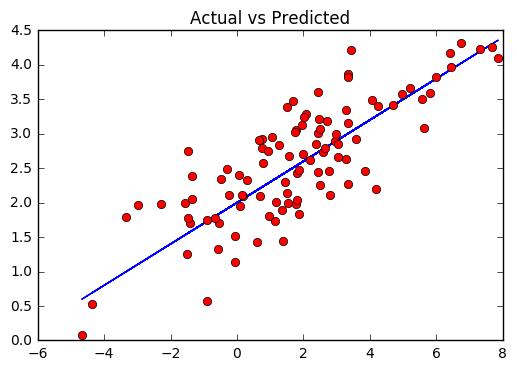

In [5]:
plt.plot(x,ypred)
plt.plot(x,yact,'ro')
plt.title('Actual vs Predicted')

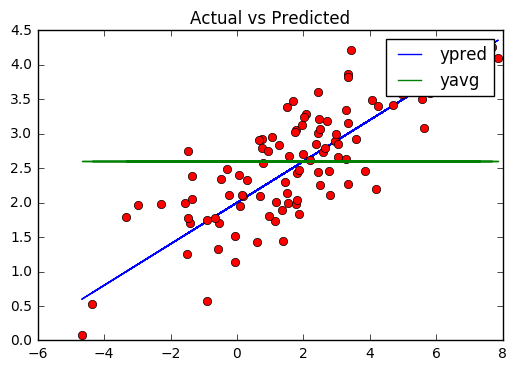

In [6]:
ymean=np.mean(yact)
plt.plot(x,ypred, label='ypred')
plt.plot(x,yact,'ro')
yavg=[ymean for i in range(1,len(xlist)+1)]
plt.plot(x,yavg, label='yavg')
plt.title('Actual vs Predicted')
plt.legend()

The total variability is explained as the Total Sum of Squares or SST:
    SST = ∑(yact - yavg)^2  

SSD = ∑(ypred - yact)^2


SSR = ∑(ypred - yavg)^2


R^2 = SSR/SST

Since SSR<=SST, so 0 < R^2 < 1

In [7]:
df['SSR']=(df['Predicted_Output(ypred)']-ymean)**2
df['SST']=(df['Actual_Output(yact)']-ymean)**2
SSR=df.sum()['SSR']
SST=df.sum()['SST']
SSR/SST

0.77254690094863554

In [8]:
xmean=np.mean(df['Input_Variable(X)'])
ymean=np.mean(df['Actual_Output(yact)'])
df['beta']=(df['Input_Variable(X)']-xmean)*(df['Actual_Output(yact)']-ymean)
df['xvar']=(df['Input_Variable(X)']-xmean)**2
betan=df.sum()['beta']
betad=df.sum()['xvar']
beta=betan/betad

alpha=ymean-(betan/betad)*xmean
beta,alpha

(0.27519401744181399, 2.1086567141394847)

In [9]:
df['ymodel']=beta*df['Input_Variable(X)']+alpha

In [10]:
df['SSR']=(df['ymodel']-ymean)**2
df['SST']=(df['Actual_Output(yact)']-ymean)**2
SSR=df.sum()['SSR']
SST=df.sum()['SST']
SSR/SST

0.64528495371558448

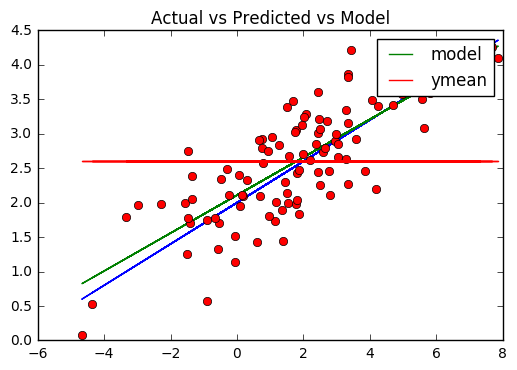

In [11]:
%matplotlib inline
plt.plot(x,ypred)
plt.plot(x,df['ymodel'], label='model')
plt.plot(x,yact,'ro' )
plt.plot(x,yavg, label='ymean')
plt.title('Actual vs Predicted vs Model')
plt.legend()

In [12]:
advert = pd.read_csv('Advertising.csv', index_col=0)
advert.head()

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [13]:
from sklearn.linear_model import LinearRegression

In [14]:
model = LinearRegression()

In [15]:
x = advert[['TV']]
y = advert['Sales']

In [16]:
model.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [17]:
print(model.intercept_)
print(model.coef_)

7.03259354913
[ 0.04753664]


In [18]:
model.score(x,y)

0.61187505085007099

In [19]:
from statsmodels.regression import linear_model
from sklearn.metrics import mean_squared_error

In [20]:
np.sqrt(mean_squared_error(yact, ypred))

0.5124701264885162

In [21]:
from statsmodels.formula.api import ols

In [22]:
model1 = ols(formula = 'Sales ~ TV', data = advert)

In [23]:
res = model1.fit()

In [24]:
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Sat, 14 Jan 2017   Prob (F-statistic):           1.47e-42
Time:                        20:42:14   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      7.0326      0.458     15.360      0.000         6.130     7.935
TV             0.0475      0.003     17.668      0.000         0.042     0.053
==============================================================================
Omnibus:                        0.531   Durbin-Watson:                   1.935
Prob(Omnibus):                  0.767   Jarque-Bera (JB):                0.669
Skew:                          -0.089   Prob(JB):                        0.716
Kurtosis:                       2.779   Cond. No.                         338.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [25]:
model2 = ols(formula='Sales ~ TV + Newspaper', data = advert)

In [26]:
res2 = model2.fit()

In [27]:
res2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.646
Model:                            OLS   Adj. R-squared:                  0.642
Method:                 Least Squares   F-statistic:                     179.6
Date:                Sat, 14 Jan 2017   Prob (F-statistic):           3.95e-45
Time:                        20:42:21   Log-Likelihood:                -509.89
No. Observations:                 200   AIC:                             1026.
Df Residuals:                     197   BIC:                             1036.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      5.7749      0.525     10.993      0.000         4.739     6.811
TV             0.0469      0.003     18.173      0.000         0.042     0.052
Newspaper      0.0442      0.010      4.346      0.000         0.024     0.064
==============================================================================
Omnibus:                        0.658   Durbin-Watson:                   1.969
Prob(Omnibus):                  0.720   Jarque-Bera (JB):                0.415
Skew:                          -0.093   Prob(JB):                        0.813
Kurtosis:                       3.122   Cond. No.                         410.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [103]:
res2.pvalues

Intercept    3.145860e-22
TV           5.507584e-44
Newspaper    2.217084e-05
dtype: float64